In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
from citipy import citipy


In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=75e8cf4369c6729fa7ae4020673751a1


In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | ilva mare
Processing Record 7 of Set 1 | ende
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | bandar-e lengeh
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 18 of Set 1 | sosua
Processing Record 19 of Set 1 | teguldet
Processing Record 20 of Set 1 | tsotilion
Processing Record 21 of Set 

KeyboardInterrupt: 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,35.26,93,75,12.66,AR,2022-06-16 16:36:24
1,Bambous Virieux,-20.3428,57.7575,74.21,78,40,9.22,MU,2022-06-16 16:36:24
2,Cape Town,-33.9258,18.4232,58.26,66,0,4.61,ZA,2022-06-16 16:32:49
3,Ilva Mare,47.3667,24.9000,63.66,73,41,1.92,RO,2022-06-16 16:36:25
4,Ende,-8.8432,121.6623,75.94,85,25,0.11,ID,2022-06-16 16:36:26
5,La Ronge,55.1001,-105.2842,57.45,82,100,12.66,CA,2022-06-16 16:36:26
6,Barrow,71.2906,-156.7887,35.62,93,0,10.36,US,2022-06-16 16:34:59
7,Port Elizabeth,-33.9180,25.5701,55.69,60,0,5.75,ZA,2022-06-16 16:36:27
8,Pevek,69.7008,170.3133,29.82,86,11,5.66,RU,2022-06-16 16:36:27
9,Cidreira,-30.1811,-50.2056,67.64,62,31,2.57,BR,2022-06-16 16:36:27


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df  = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-06-16 16:36:24,-54.8000,-68.3000,35.26,93,75,12.66
1,Bambous Virieux,MU,2022-06-16 16:36:24,-20.3428,57.7575,74.21,78,40,9.22
2,Cape Town,ZA,2022-06-16 16:32:49,-33.9258,18.4232,58.26,66,0,4.61
3,Ilva Mare,RO,2022-06-16 16:36:25,47.3667,24.9000,63.66,73,41,1.92
4,Ende,ID,2022-06-16 16:36:26,-8.8432,121.6623,75.94,85,25,0.11
...,...,...,...,...,...,...,...,...,...
128,Half Moon Bay,US,2022-06-16 16:39:35,37.4636,-122.4286,71.58,73,100,19.57
129,Mantua,IT,2022-06-16 16:39:35,45.1667,10.7833,92.44,50,28,1.99
130,Lata,PT,2022-06-16 16:39:35,40.1629,-8.3327,74.07,53,88,2.17
131,Ahipara,NZ,2022-06-16 16:39:36,-35.1667,173.1667,55.20,89,57,4.36


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

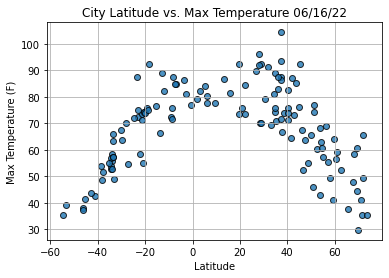

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

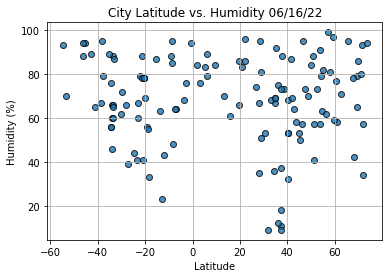

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

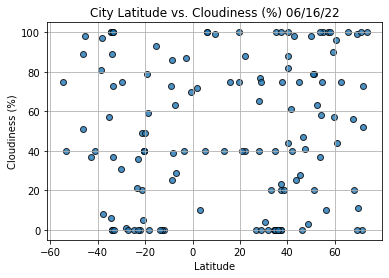

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

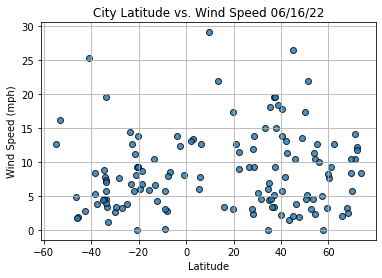

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()